***Fase inicial general:***

In [1]:
import pandas as pd 
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.impute as ski

archivo = 'data.csv'
archivo_2 = 'fighters_data.csv'

ufc = pd.read_csv(archivo)
ufc_f = pd.read_csv(archivo_2)

***Dataset Ufc***

In [2]:
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.5+ MB


In [4]:
print(ufc.shape)

(5144, 145)


In [5]:
set_option('precision',2)
ufc.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.00,5144.00,5144.00,5144.0,3879.00,3879.00,3879.00,3879.00,3879.00,3879.00,...,5144.00,5144.00,5144.00,5144.00,5144.00,5140.00,4828.00,5141.00,4972.00,5080.00
mean,3.12,0.43,0.84,0.0,8.69,6.08,8.24,5.56,53.16,19.33,...,1.18,1.25,0.78,0.07,3.60,179.27,183.66,172.08,29.17,29.44
std,0.63,0.73,1.31,0.0,7.09,5.07,7.58,5.43,41.25,15.96,...,1.60,1.80,1.33,0.28,3.71,8.64,10.30,35.16,4.08,4.14
min,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,152.40,152.40,115.00,18.00,19.00
25%,3.00,0.00,0.00,0.0,3.50,2.33,3.00,2.00,22.00,7.67,...,0.00,0.00,0.00,0.00,1.00,172.72,177.80,145.00,26.00,26.00
50%,3.00,0.00,0.00,0.0,7.00,5.00,6.33,4.20,44.67,15.20,...,1.00,1.00,0.00,0.00,2.00,180.34,182.88,170.00,29.00,29.00
75%,3.00,1.00,1.00,0.0,12.22,8.50,11.42,7.74,74.33,27.14,...,2.00,2.00,1.00,0.00,5.00,185.42,190.50,185.00,32.00,32.00
max,5.00,6.00,13.00,0.0,49.00,39.00,87.00,68.00,271.00,130.00,...,10.00,11.00,13.00,2.00,20.00,210.82,213.36,345.00,51.00,47.00


***Tratamiento de columnas***

In [6]:
columnas = ufc.columns
print(list(columnas))

['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak', 'B_losses', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_GROUND_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_opp_KD', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_op

In [7]:
alt = pd.read_csv('raw_total_fight_data.csv',sep=';')

ganador = list(alt['Winner'])
ufc.insert(2,'Ganador',ganador,True)

method = list(alt['win_by'])
ufc.insert(3,'win_by',method,True)

Formato = list(alt['Format'])
ufc.insert(4,'Formato',Formato,True) 

ult_asalto = list(alt['last_round'])
ufc.insert(5,'ult_asalto',ult_asalto,True)


In [8]:
ufc['Formato'] = ufc['Formato'].apply(lambda x : x.split('(')[0])
ufc['Formato'] = ufc['Formato'].apply(lambda x : x.split('+')[0])
ufc['location'] = ufc['location'].apply(lambda x : x.split(',')[-1])
ufc['date'] = ufc['date'].apply(lambda x: x.split('-')[0])


In [9]:
ufc.head()

,R_fighter,B_fighter,Ganador,win_by,Formato,ult_asalto,Referee,date,location,Winner,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Henry Cejudo,KO/TKO,5 Rnd,3,Marc Goddard,2019,USA,Red,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko,KO/TKO,5 Rnd,2,Robert Madrigal,2019,USA,Red,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Tony Ferguson,TKO - Doctor's Stoppage,3 Rnd,2,Dan Miragliotta,2019,USA,Red,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Petr Yan,Decision - Unanimous,3 Rnd,3,Kevin MacDonald,2019,USA,Blue,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov,Decision - Unanimous,3 Rnd,3,Dan Miragliotta,2019,USA,Blue,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


***Tratamiento de valores faltantes***

In [10]:
ufc.isna().sum().sum()

95473

In [11]:
null = []
for index, col in enumerate(ufc):
    null.append((index,ufc[col].isna().sum()))
null.sort(key = lambda x : x[1])
for i in range(len(ufc.columns)):
    print("En la columna",ufc.columns[null[i][0]],"hay;",null[i][1],"valores IsNull")

En la columna R_fighter hay; 0 valores IsNull
En la columna B_fighter hay; 0 valores IsNull
En la columna win_by hay; 0 valores IsNull
En la columna Formato hay; 0 valores IsNull
En la columna ult_asalto hay; 0 valores IsNull
En la columna date hay; 0 valores IsNull
En la columna location hay; 0 valores IsNull
En la columna Winner hay; 0 valores IsNull
En la columna title_bout hay; 0 valores IsNull
En la columna weight_class hay; 0 valores IsNull
En la columna no_of_rounds hay; 0 valores IsNull
En la columna B_current_lose_streak hay; 0 valores IsNull
En la columna B_current_win_streak hay; 0 valores IsNull
En la columna B_draw hay; 0 valores IsNull
En la columna B_longest_win_streak hay; 0 valores IsNull
En la columna B_losses hay; 0 valores IsNull
En la columna B_total_rounds_fought hay; 0 valores IsNull
En la columna B_total_title_bouts hay; 0 valores IsNull
En la columna B_win_by_Decision_Majority hay; 0 valores IsNull
En la columna B_win_by_Decision_Split hay; 0 valores IsNull
En 

In [12]:
col_num = ['R_Weight_lbs','R_Height_cms','B_Height_cms','R_age','B_age','R_Reach_cms','B_Reach_cms']

imp = ski.SimpleImputer(missing_values=np.nan , strategy='median')

for col in col_num:
    imputer_mediana = imp.fit_transform(ufc[col].values.reshape(-1,1))
    ufc[col] = imputer_mediana



imp_ = ski.SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imp_r = imp_.fit_transform(ufc['R_Stance'].values.reshape(-1,1))
imp_b = imp_.fit_transform(ufc['B_Stance'].values.reshape(-1,1))
ufc['R_Stance'] = imp_r
ufc['B_Stance'] = imp_b



ufc['Referee'].fillna(value='NO DATA', inplace=True)
ufc['Ganador'].fillna(value='NO WINNER', inplace=True)

print(ufc.isna().sum().sum())


93841


***DATASET UFC_F***

***Fase Inicial***

In [13]:
ufc_f.head()

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States


In [14]:
ufc_f.shape

(1561, 11)

Tratamiento Columnas:

In [15]:
col = ufc_f.columns

print(list(col))
print(list(ufc_f.dtypes))

['url', 'fid', 'name', 'nick', 'birth_date', 'height', 'weight', 'association', 'class', 'locality', 'country']
[dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


In [16]:
ufc_f = ufc_f.drop(['url','fid','locality','nick'], axis=1)
ufc_f

,name,birth_date,height,weight,association,class,country
0,Conor McGregor,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Ireland
1,Jon Jones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,United States
2,Holly Holm,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,United States
3,Dominick Cruz,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,United States
4,Demetrious Johnson,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,United States
...,...,...,...,...,...,...,...
1556,Thaddeus Luster,NaN,75.0,200.0,NaN,Light Heavyweight,United States
1557,Frank Hamaker,NaN,74.0,245.0,NaN,Heavyweight,Netherlands
1558,Ryan Parker,NaN,75.0,235.0,NaN,Heavyweight,United States
1559,Marcus Davis,8/24/1973,68.0,170.0,Team Irish,Welterweight,United States


***Tratamiento valores faltantes***

In [17]:
ufc_f.isna().sum().sum()

551

In [18]:
null = []
for index, col in enumerate(ufc_f):
    null.append((index,ufc_f[col].isna().sum()))
null.sort(key = lambda x : x[1])
for i in range(len(ufc_f.columns)):
    print("En la columna",ufc_f.columns[null[i][0]],"hay;",null[i][1],"valores IsNull")

En la columna name hay; 1 valores IsNull
En la columna weight hay; 28 valores IsNull
En la columna country hay; 28 valores IsNull
En la columna class hay; 35 valores IsNull
En la columna height hay; 55 valores IsNull
En la columna association hay; 195 valores IsNull
En la columna birth_date hay; 209 valores IsNull


In [19]:
col_num = ['height','weight']

imp = ski.SimpleImputer(missing_values=np.nan , strategy='median')

for col in col_num:
    imputer_mediana = imp.fit_transform(ufc_f[col].values.reshape(-1,1))
    ufc_f[col] = imputer_mediana
    
ufc_f['name'].fillna(value='NO DATA', inplace=True)
ufc_f['country'].fillna(value='NO DATA', inplace=True)
ufc_f['class'].fillna(value='NO DATA', inplace=True)
ufc_f['association'].fillna(value='NO DATA', inplace=True)
ufc_f['birth_date'].fillna(value='NO DATA' , inplace=True)

print(ufc_f.isna().sum().sum())


0


Modificación de columnas

In [20]:
ufc_f['birth_date'] = ufc_f['birth_date'].apply(lambda x : x.split('/')[-1])

X = []
for f in ufc_f['height']:
    X.append(f*0.0254)
        
Y = []
for p in ufc_f['weight']:
    Y.append(p*0.45359237)


ufc_f['height_'] = pd.Series(X, dtype='float')
ufc_f['weight_'] = pd.Series(Y, dtype='float')
ufc_f = ufc_f.drop(['height','weight'],axis =1)

pd.set_option('precision',2)

ufc_f.head(5)

,name,birth_date,association,class,country,height_,weight_
0,Conor McGregor,1988,SBG Ireland,Featherweight,Ireland,1.73,65.77
1,Jon Jones,1987,Jackson-Wink MMA,Light Heavyweight,United States,1.93,92.99
2,Holly Holm,1981,Jackson-Wink MMA,Bantamweight,United States,1.73,61.23
3,Dominick Cruz,1985,Alliance MMA,Bantamweight,United States,1.73,60.78
4,Demetrious Johnson,1986,AMC Pankration,Flyweight,United States,1.60,56.70


***FASE DE VISUALIZACIÓN***

EVENTOS

Text(0.5, 1.0, 'Nº de eventos por año')

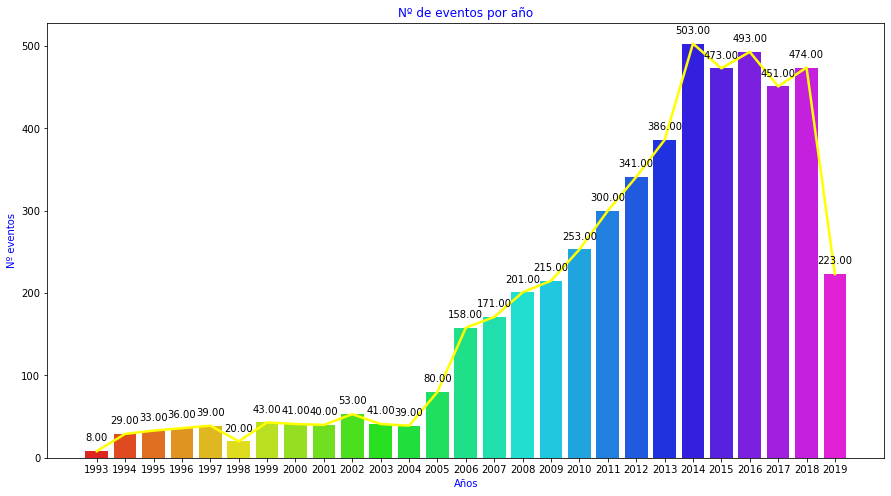

In [21]:
valores = ufc['date'].value_counts().sort_values().sort_index()
eventos = valores.index

plt.figure(figsize=(15,8))
fig = sns.barplot(x=eventos,y=valores, palette='gist_rainbow')
plt.plot(eventos,valores, color='Yellow', linewidth=2.5)
for p in fig.patches:
    fig.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2.,
                                                p.get_height()), ha = 'center', xytext = (0, 10),
                                                 textcoords = 'offset points')
    
plt.xlabel('Años',color='blue')
plt.ylabel('Nº eventos',color='blue')
plt.title('Nº de eventos por año',color='blue')

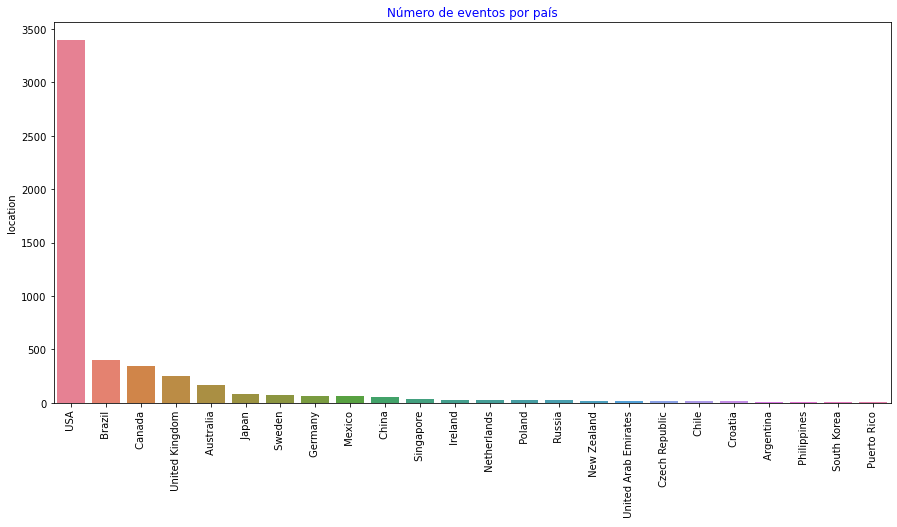

In [22]:
valores = ufc['location'].value_counts()
eventos = valores.index

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.title('Número de eventos por país',color='blue')
fig = sns.barplot(x=eventos,y=valores, palette='husl')


COMBATES

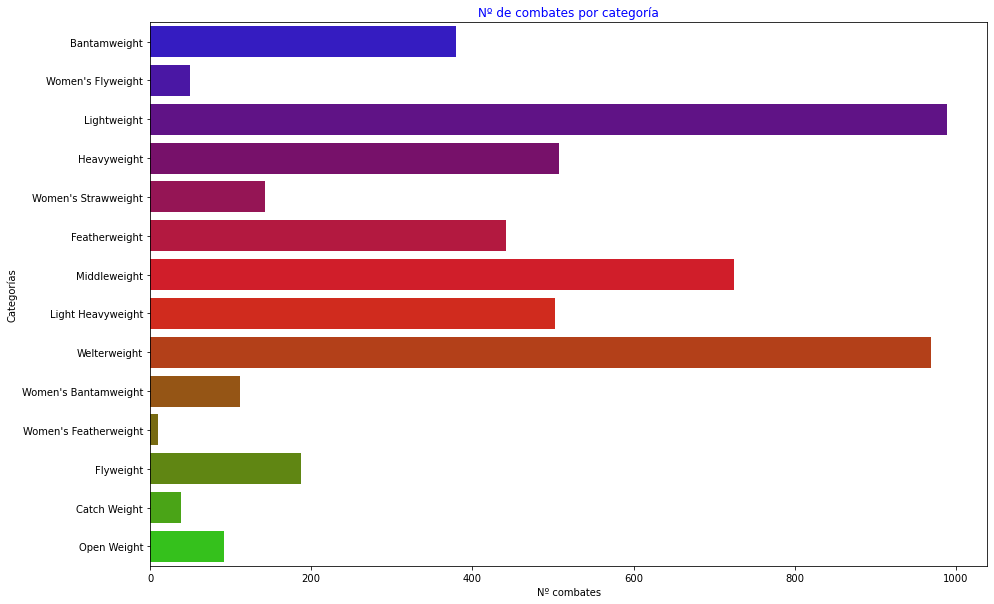

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(y=ufc['weight_class'], palette='brg')
plt.xlabel('Nº combates')
plt.ylabel('Categorías')
plt.title('Nº de combates por categoría',color='blue')
plt.show()

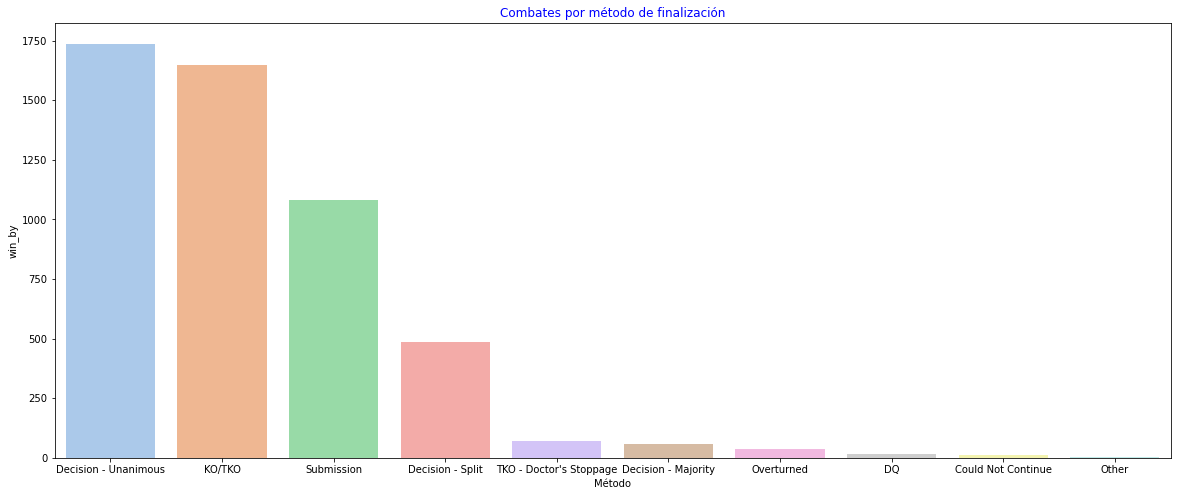

In [24]:
valores = ufc['win_by'].value_counts()
metodo = valores.index

plt.figure(figsize=(20,8))
plt.title('Combates por método de finalización', color='blue')
plt.xlabel('Método')
fig = sns.barplot(x=metodo,y=valores, palette='pastel')


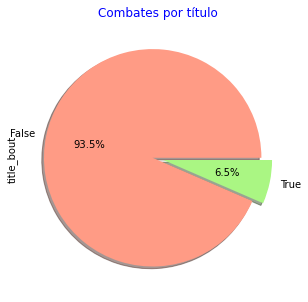

In [25]:
plt.figure(figsize=(5,5))
colores=["#FF9B85","#AAF683"]
ufc['title_bout'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True, colors=colores)
plt.title('Combates por título', color='blue')
plt.show()

In [26]:
ufc['Formato'].value_counts()

3 Rnd            4524
5 Rnd             423
1 Rnd             149
No Time Limit      37
2 Rnd              11
Name: Formato, dtype: int64

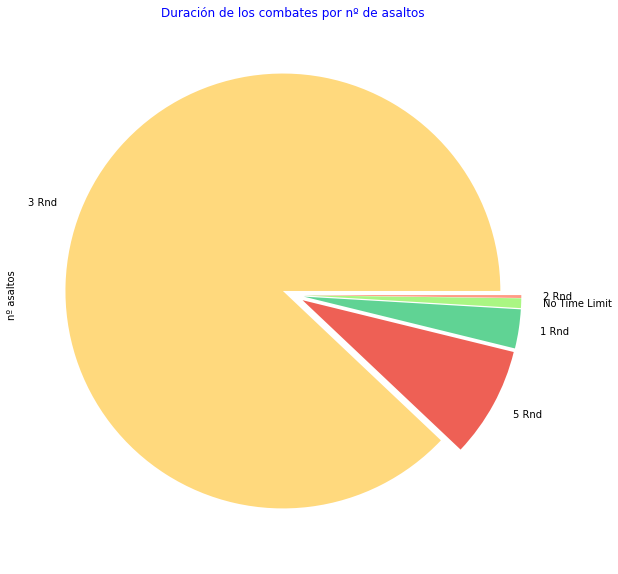

In [27]:
plt.figure(figsize=(20,10))
colores = colores = ["#FFD97D","#EE6055","#60D394","#AAF683","#FF9B85"]
ufc['Formato'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct=None,shadow=False, 
                                            colors=colores)
plt.title('Duración de los combates por nº de asaltos', color='blue')
plt.ylabel('nº asaltos')
plt.show()

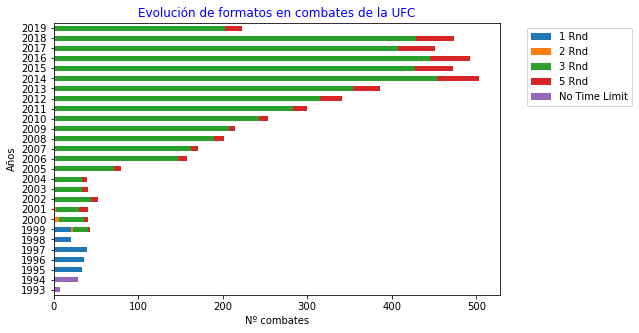

In [28]:
for_data = ufc.groupby(['date','Formato']).size().reset_index().pivot(
    columns='Formato',index='date', values=0)
for_data.plot(kind='barh',alpha=1, width=0.5, stacked=True,figsize=(8,5))
plt.xlabel('Nº combates')
plt.ylabel('Años')
plt.title('Evolución de formatos en combates de la UFC',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

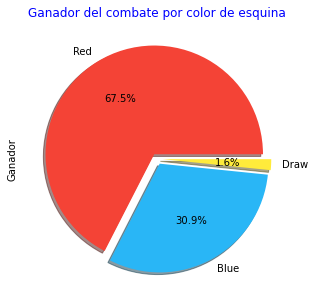

In [29]:
plt.figure(figsize=(5,5))
colores=["#F44336","#29B6F6","#FFEB3B"]
ufc['Winner'].value_counts().plot.pie(explode=[0.05,0.05,0.05],
                                      autopct='%1.1f%%',shadow=True, colors=colores)
plt.title('Ganador del combate por color de esquina', color='blue')
plt.ylabel('Ganador')
plt.show()

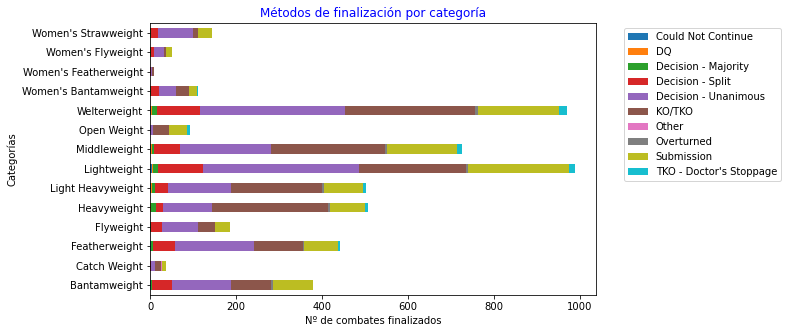

In [30]:
cat_met = ufc.groupby(['weight_class','win_by']).size().reset_index().pivot(
    columns='win_by',index='weight_class', values=0)
cat_met.plot(kind='barh',alpha=1, width=0.5, stacked=True,figsize=(8,5))
plt.xlabel('Nº de combates finalizados')
plt.ylabel('Categorías')
plt.title('Métodos de finalización por categoría',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

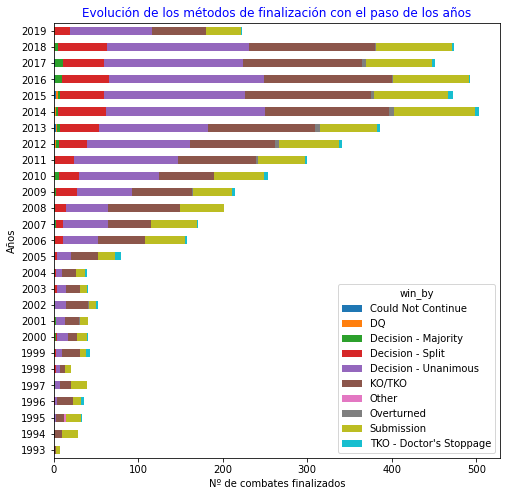

In [31]:
cat_fecha = ufc.groupby(['date','win_by']).size().reset_index().pivot(columns='win_by',index='date', values=0)
cat_fecha.plot(kind='barh',alpha=1, width=0.5, stacked=True,figsize=(8,8))
plt.title('Evolución de los métodos de finalización con el paso de los años', color='blue')
plt.xlabel('Nº de combates finalizados')
plt.ylabel('Años')
plt.show()

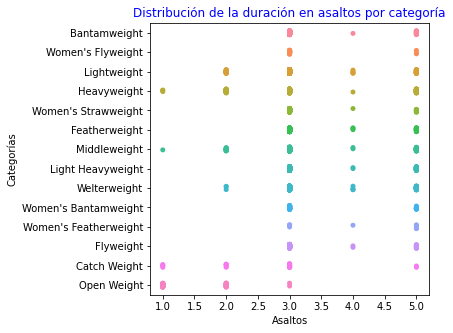

In [32]:
plt.figure(figsize=(5,5))
sns.stripplot(x='no_of_rounds',y='weight_class',data=ufc)
plt.title('Distribución de la duración en asaltos por categoría', color='blue')
plt.xlabel('Asaltos')
plt.ylabel('Categorías')
plt.show()

<AxesSubplot:title={'center':'Posturas luchadores esquina roja'}, ylabel='R_Stance'>

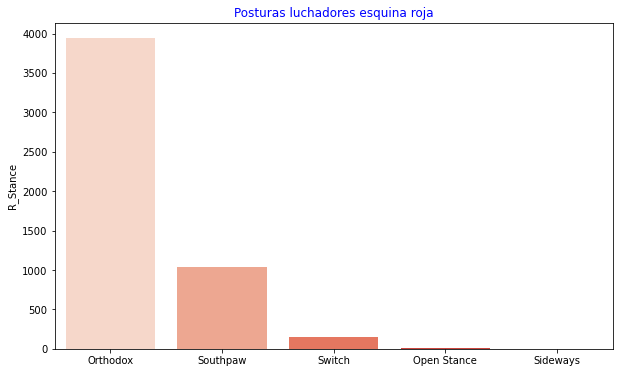

In [33]:
valores = ufc['R_Stance'].value_counts().sort_values(ascending=False)
posturas_r = valores.index

plt.figure(figsize=(10,6))
plt.title('Posturas luchadores esquina roja', color='blue')

sns.barplot(x=posturas_r,y=valores, palette='Reds')


<AxesSubplot:title={'center':'Posturas luchadores esquina azul'}, ylabel='B_Stance'>

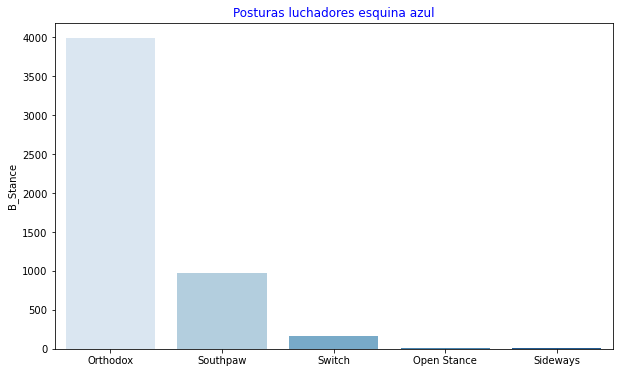

In [34]:
valores = ufc['B_Stance'].value_counts().sort_values(ascending=False)
posturas_r = valores.index
plt.figure(figsize=(10,6))
plt.title('Posturas luchadores esquina azul', color='blue')
sns.barplot(x=posturas_r,y=valores, palette='Blues')

Text(0.5, 1.0, 'Posturas luchadores esquina roja')

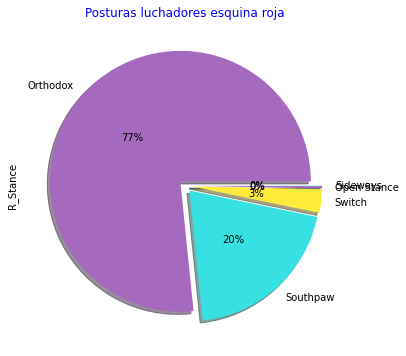

In [35]:
plt.figure(figsize=(6,6))
colores=["#A569BD","#38E1E1","#FFEB3B"]
ufc['R_Stance'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],
                                      autopct='%.0f%%',shadow=True, 
                                        colors=colores, pctdistance=0.5)
plt.title('Posturas luchadores esquina roja', color='blue')

ANALISIS LUCHADORES

In [36]:
ufc_f.head()

,name,birth_date,association,class,country,height_,weight_
0,Conor McGregor,1988,SBG Ireland,Featherweight,Ireland,1.73,65.77
1,Jon Jones,1987,Jackson-Wink MMA,Light Heavyweight,United States,1.93,92.99
2,Holly Holm,1981,Jackson-Wink MMA,Bantamweight,United States,1.73,61.23
3,Dominick Cruz,1985,Alliance MMA,Bantamweight,United States,1.73,60.78
4,Demetrious Johnson,1986,AMC Pankration,Flyweight,United States,1.60,56.70


<AxesSubplot:ylabel='country'>

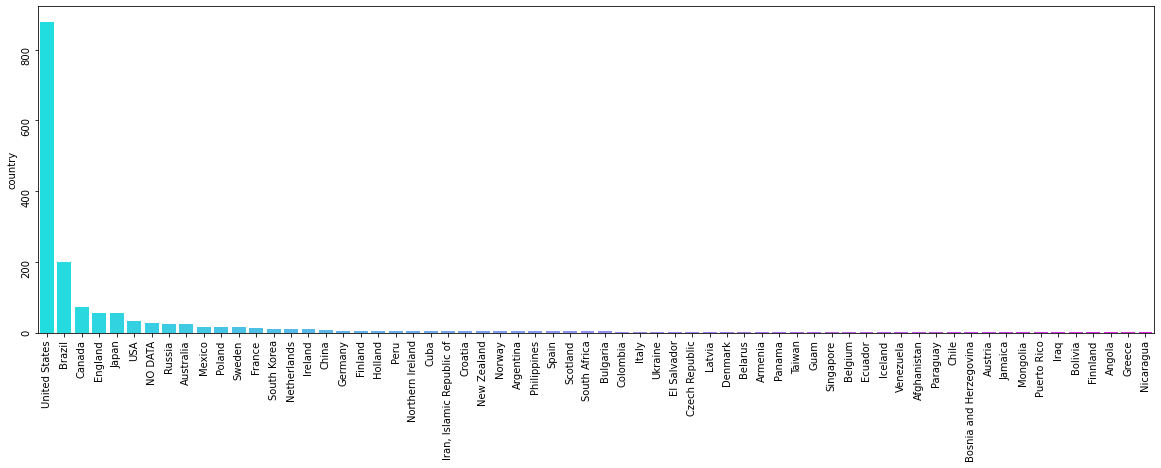

In [37]:
paises = ufc_f['country'].value_counts().sort_values(ascending=False)
num = paises.index
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.barplot(x=num, y=paises, palette='cool')

In [38]:
paises_top = ufc_f['country'].value_counts().sort_values(False).sort_index()
paises_top = pd.DataFrame(data=paises_top)
paises_top = paises_top.loc[paises_top.country>5]
paises_top['paises_top'] = paises_top.index
paises_top['n_luchadores'] = paises_top['country']
del paises_top['country']
paises_top.reset_index(drop=True,inplace=True)
paises_top.drop([9,15],inplace=True, axis=0)
paises_top

,paises_top,n_luchadores
0,Australia,23
1,Brazil,199
2,Canada,72
3,China,8
4,England,55
5,France,12
6,Ireland,9
7,Japan,55
8,Mexico,17
10,Netherlands,10


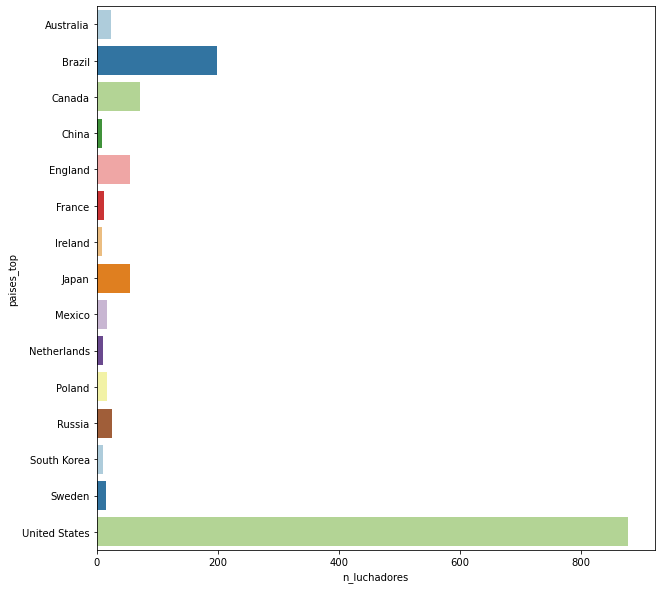

In [39]:
paises_t = paises_top['paises_top']
n_luchadores = paises_top['n_luchadores']
plt.figure(figsize=(10,10))
fig= sns.barplot(x=n_luchadores, y=paises_t,palette='Paired')

In [40]:
ufc_f['association'].unique()

array(['SBG Ireland', 'Jackson-Wink MMA', 'Alliance MMA',
       'AMC Pankration', 'Team Hayastan', 'Werdum Combat Team',
       'American Top Team', 'Nova Uniao', 'Team Alpha Male',
       'Gracie Technics', 'The MMA Clinic', 'Tapout Training Center',
       'Blackzilians', 'Power MMA Team', 'HB Ultimate',
       'Allstars Training Center', 'VMAT', 'APAM', 'Wolfslair Academy',
       'Universidade da Luta', "One Kick's Gym", 'Team Kerr',
       'M-1 Global Training Center', 'Xtreme Couture', 'Elite Team',
       'Roufusport', 'Altitude MMA', 'Tata Fight Team',
       'Twisted Genetiks', 'Team Oyama', 'Serra-Longo Fight Team',
       'Team Irish', 'X-Gym', 'Champion Team', 'The Arena',
       'Team Upstate Karate', 'Team Quest', "Lion's Den", 'Team Nogueira',
       'Canadian Fighting Centre', 'Black Sheep MMA',
       'Grudge Training Center', 'Gracie Barra Alaska', 'Peresvet FT',
       'Elite Performance', 'Pancrase Gym Sweden', 'K Dojo Warrior Tribe',
       'Red Spider MMA', 'Amer

In [41]:
escuelas = ufc_f['association'].value_counts()
escuelas = pd.DataFrame(data=escuelas)
escuelas = escuelas.loc[escuelas.association>10]
escuelas['escuelas'] = escuelas.index
escuelas['luchadores']=escuelas['association']
del escuelas['association']
escuelas.reset_index(drop=True, inplace=True)
escuelas.drop([0],inplace=True, axis=0)
escuelas

,escuelas,luchadores
1,American Top Team,55
2,Jackson-Wink MMA,40
3,Nova Uniao,24
4,American Kickboxing Academy,21
5,Blackzilians,19
6,Tristar Gym,17
7,Alliance MMA,16
8,MMA Lab,15
9,Xtreme Couture,15
10,Team Nogueira,14


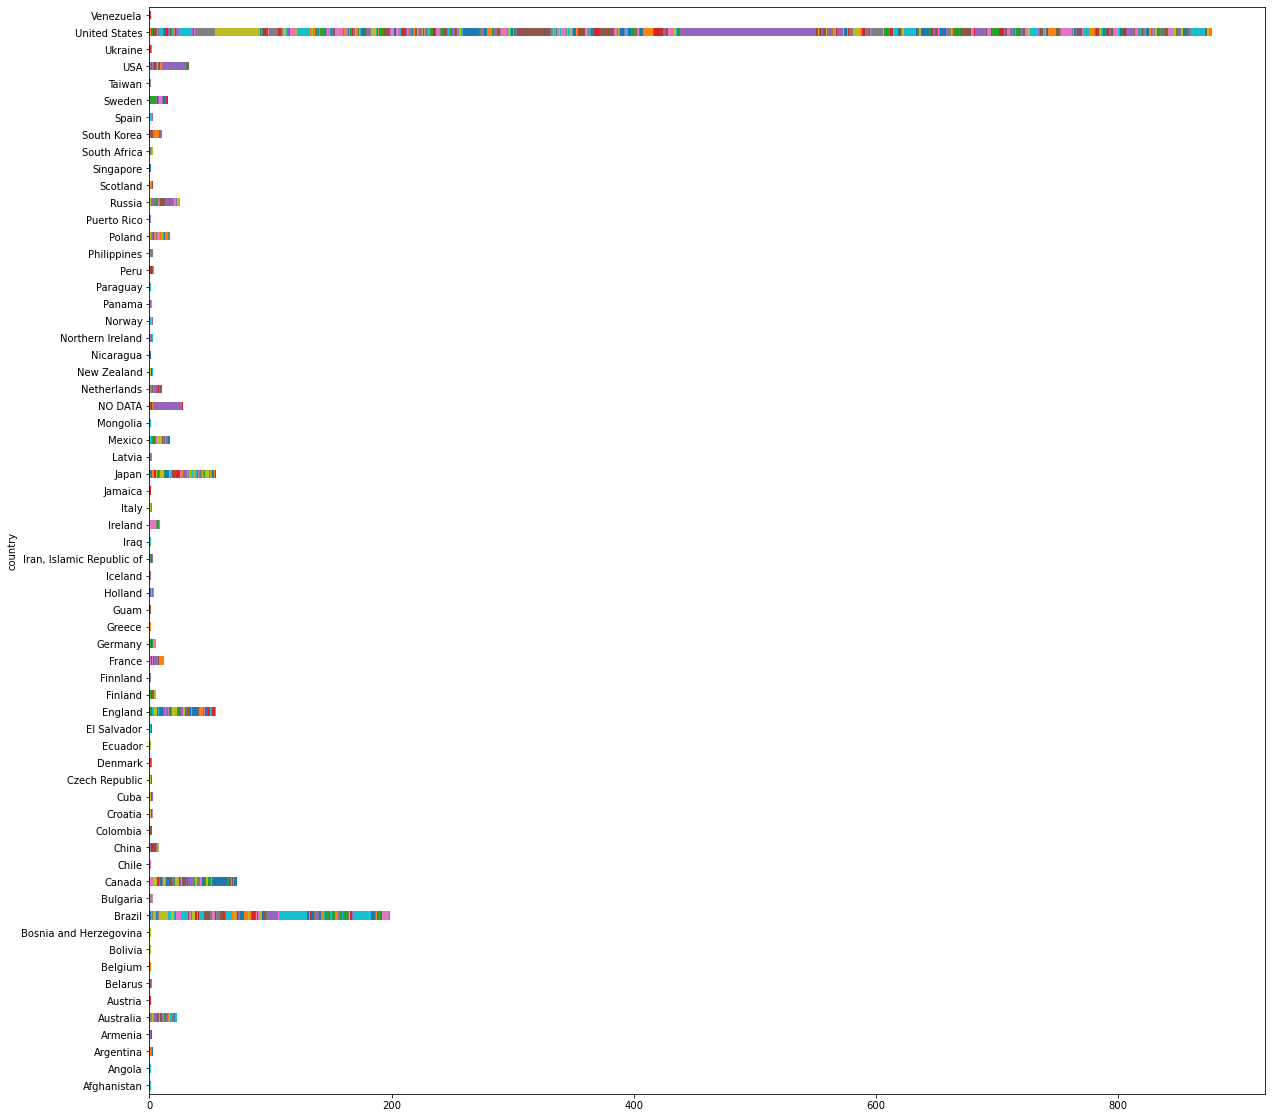

In [42]:
ass = ufc_f.groupby(['association','country']).size().reset_index().pivot(columns='association',index='country', values=0)
ass.plot(kind='barh',alpha=1, width=0.5, stacked=True,figsize=(20,20),legend=False)
sns.set_context('paper',font_scale=1.5)

Text(0.5, 1.0, 'Principales equipos historia UFC')

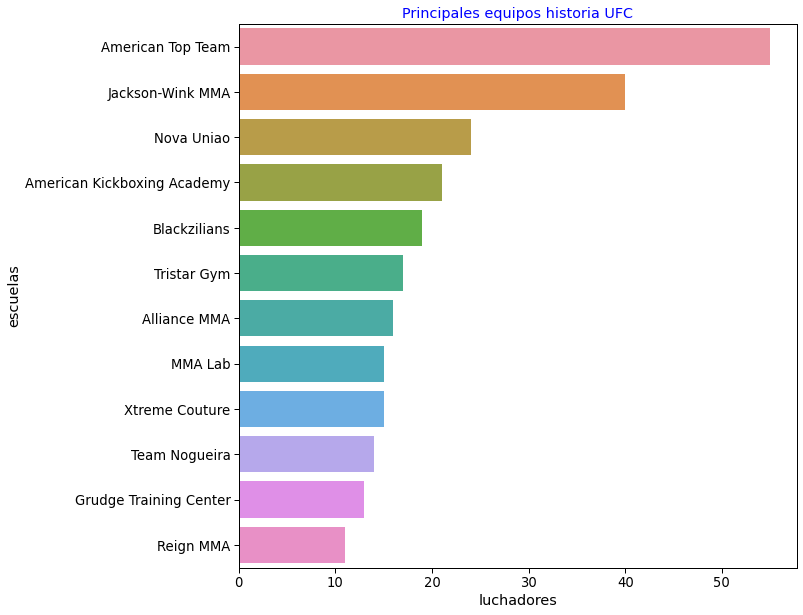

In [43]:
escuelas_t = escuelas['escuelas']
n_luchadores = escuelas['luchadores']
plt.figure(figsize=(10,10))
fig= sns.barplot(x=n_luchadores, y=escuelas_t)
plt.title('Principales equipos historia UFC', color='blue')

In [44]:
ufc_f['class'].value_counts()

Welterweight         293
Lightweight          243
Middleweight         218
Heavyweight          187
Light Heavyweight    184
Featherweight        150
Bantamweight         133
Flyweight             59
Strawweight           39
NO DATA               35
Super Heavyweight     19
Atomweight             1
Name: class, dtype: int64

<AxesSubplot:title={'center':'Distribución luchadores por categorías'}, ylabel='class'>

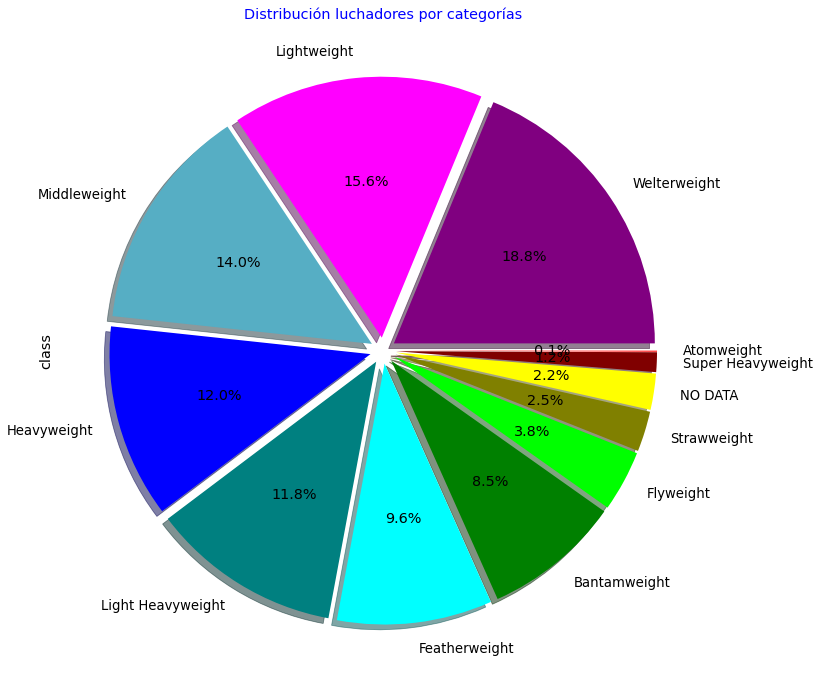

In [45]:
plt.figure(figsize=(20,12))
plt.title('Distribución luchadores por categorías', color='blue')
colores=['#800080','#FF00FF','#56AEC4','#0000FF','#008080','#00FFFF',
         '#008000','#00FF00','#808000','#FFFF00','#800000','#FF0000']
ufc_f['class'].value_counts().plot.pie(explode=[0.05,0.05,0.05,
                                                0.05,0.05,0.05,
                                                0.05,0.05,0.05,
                                                0.05,0.05,0.05],
                                       autopct='%1.1f%%',shadow=True,colors=colores)

In [46]:
col = list(ufc.columns)
filtro = [col for col in ufc if col.find('TOTAL')>=0]
totales = ufc[filtro]
totales = totales.dropna()
print(totales.isna().sum().sum())

0


<AxesSubplot:>

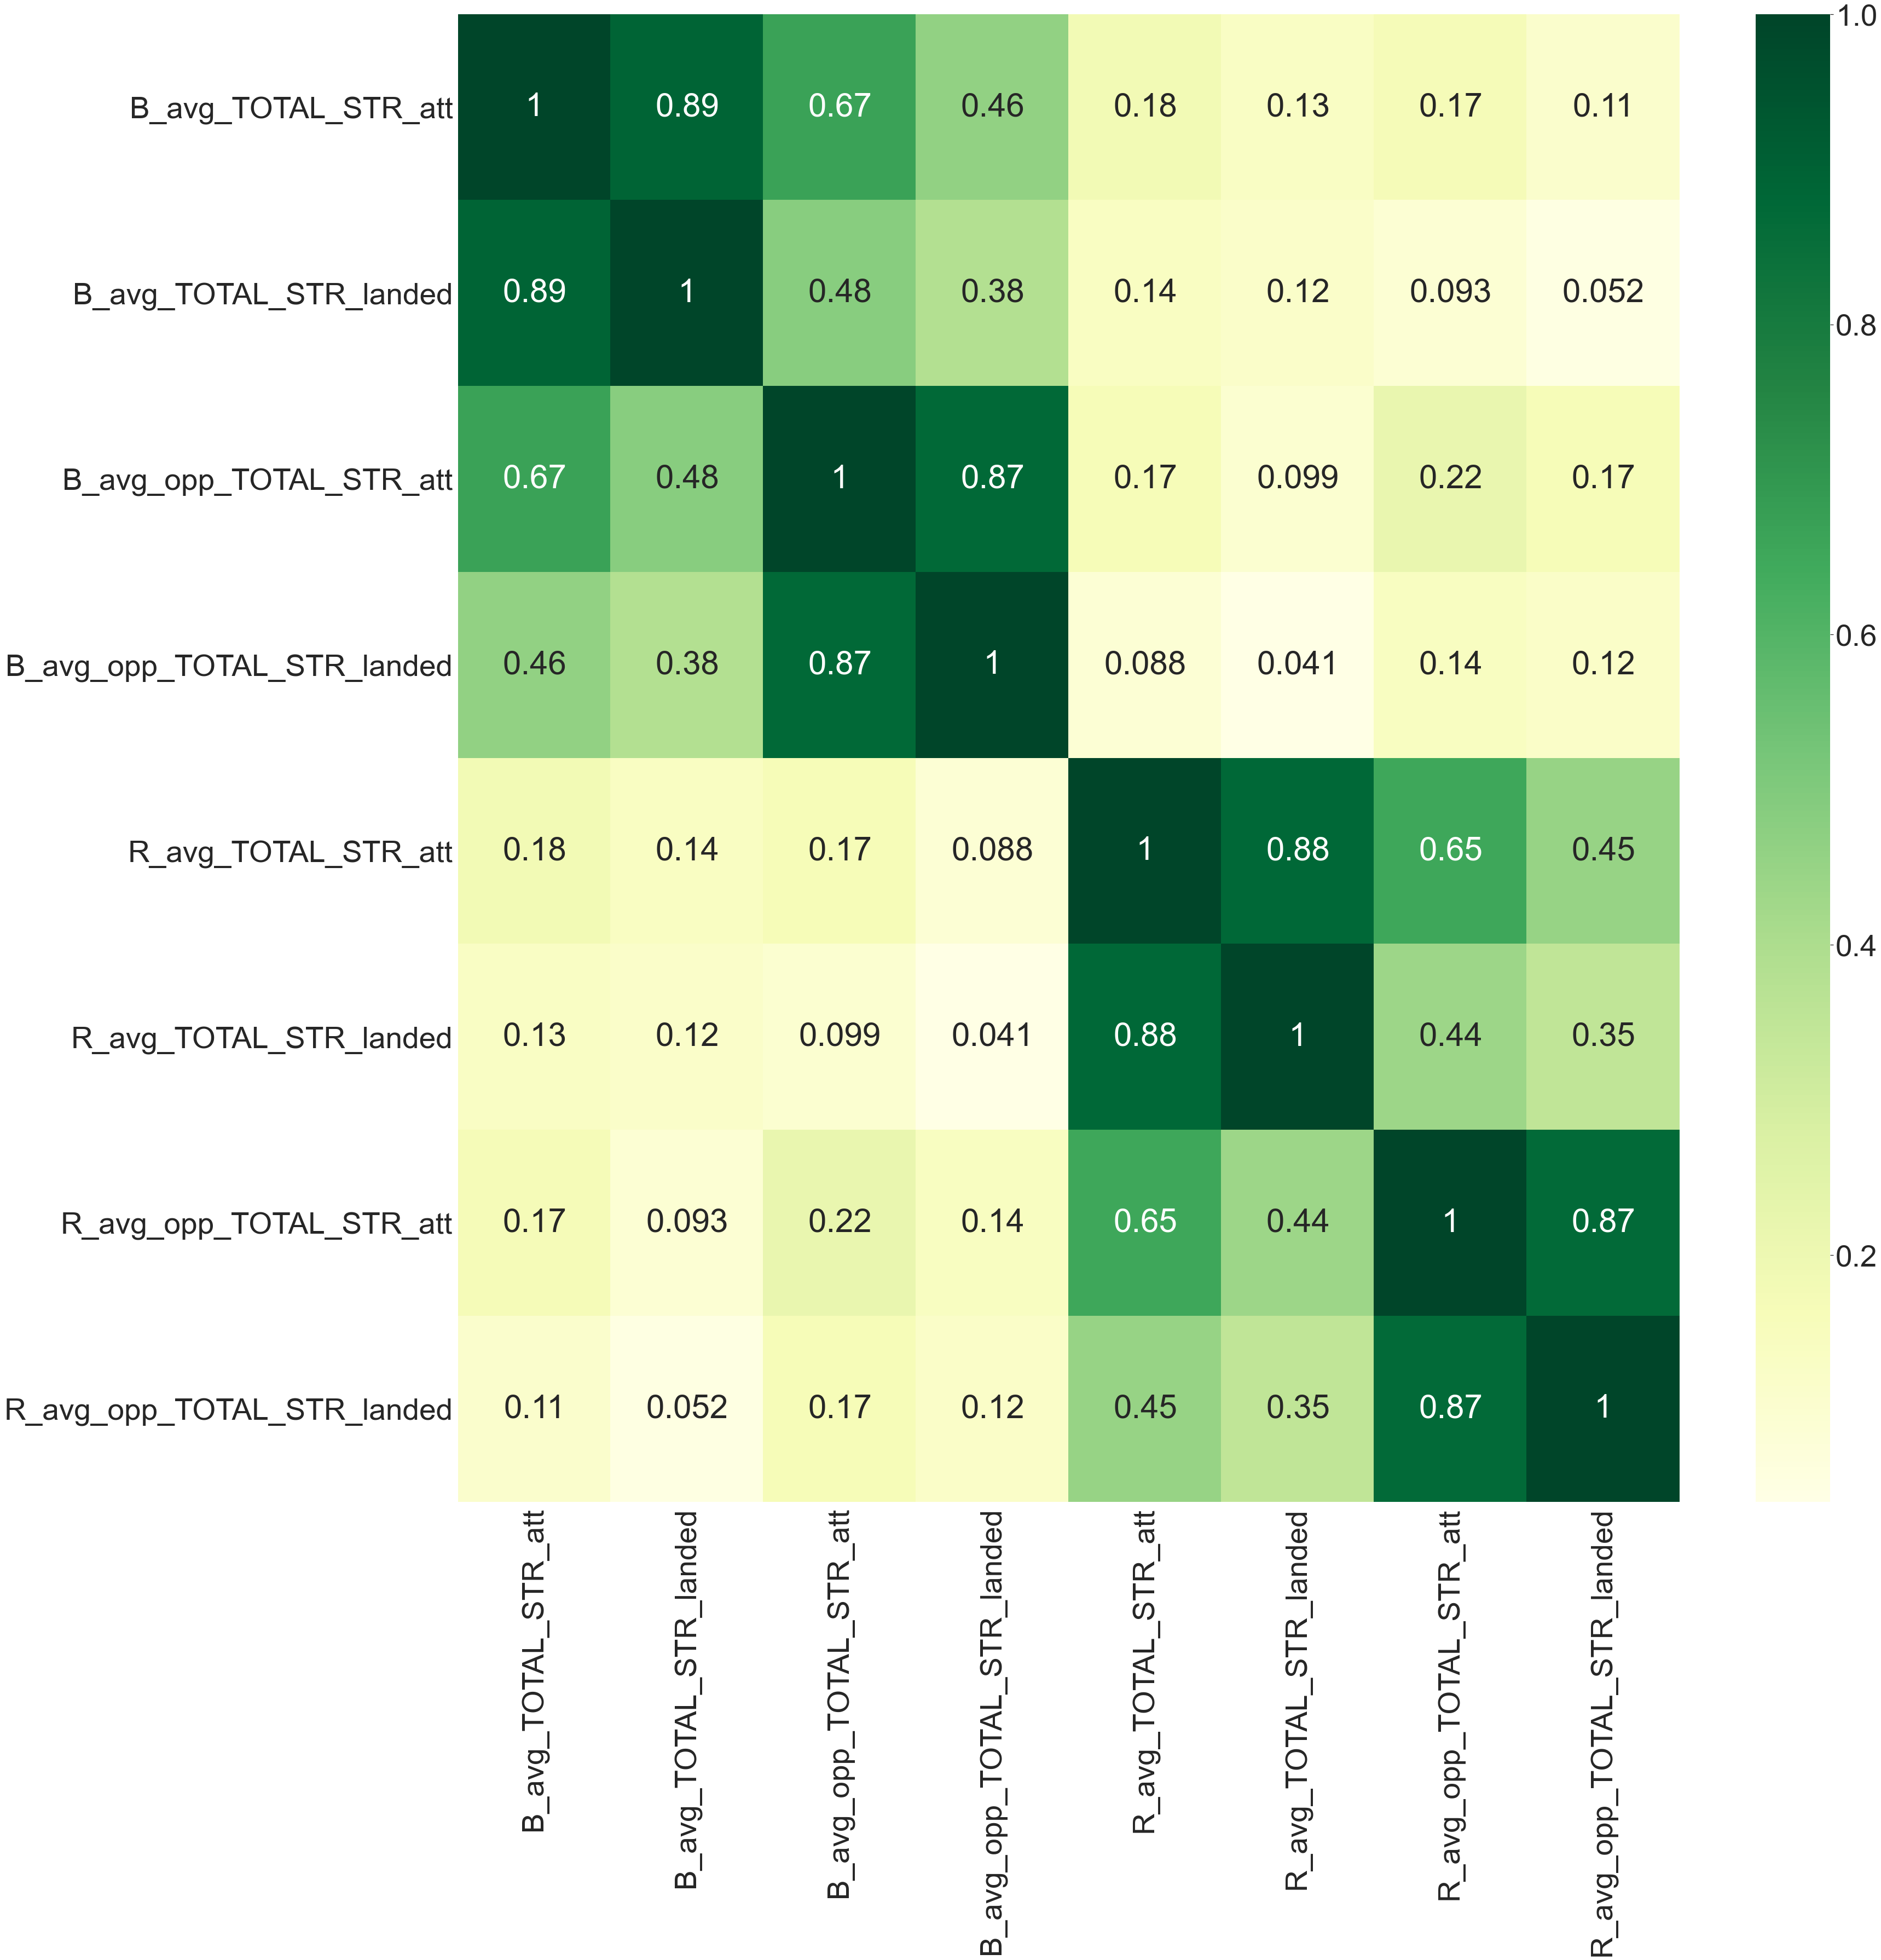

In [47]:
plt.figure(figsize=(50,50))
corr_matrix = totales.corr(method = 'pearson').abs()
sns.set(font_scale=5)
sns.heatmap(corr_matrix, annot=True, cmap="YlGn")

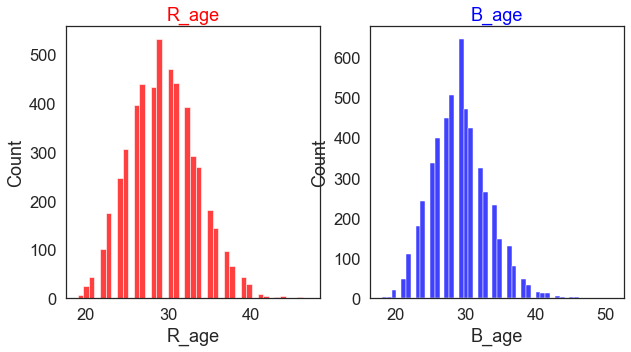

In [48]:
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(ufc['R_age'], ax=ax[0], color='red')
sns.histplot(ufc['B_age'], ax=ax[1], color='blue')
ax[0].set_title('R_age', color='red')
ax[1].set_title('B_age', color='blue')
plt.show()

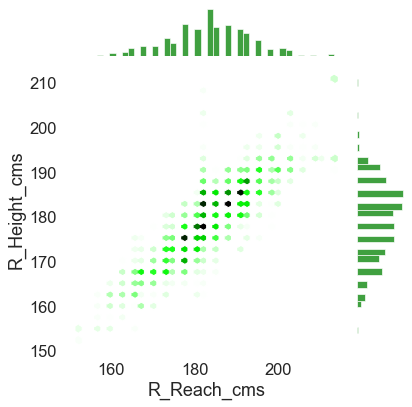

In [57]:
sns.set_style('white')
sns.jointplot(x='R_Reach_cms', y='R_Height_cms', data=ufc, kind='hex', color='green')
sns.despine(left=True, bottom=True)

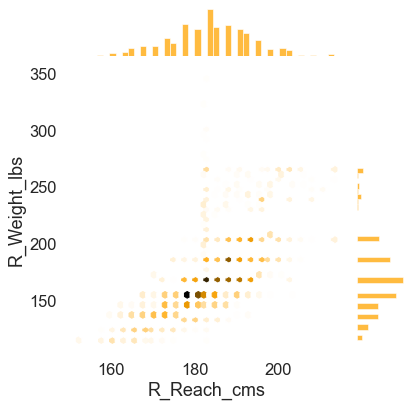

In [58]:
sns.set_style('white')
sns.jointplot(x='R_Reach_cms', y='R_Weight_lbs',
              data=ufc, kind='hex', color='orange')
sns.despine(left=True, bottom=True)


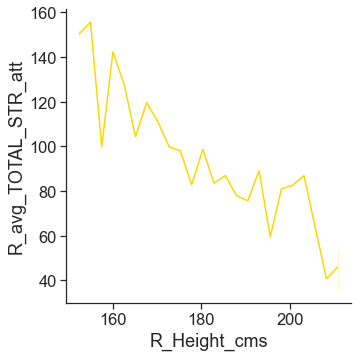

In [59]:
sns.set_style('ticks')
sns.relplot(x='R_Height_cms', y='R_avg_TOTAL_STR_att',
            data=ufc, kind='line', color='gold')

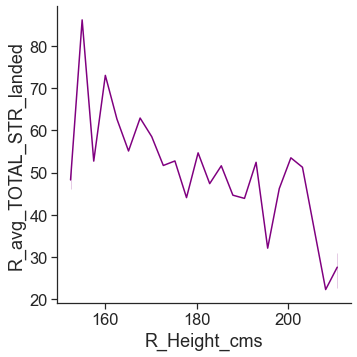

In [60]:
sns.set_style('ticks')
sns.relplot(x='R_Height_cms', y='R_avg_TOTAL_STR_landed',
            data=ufc, kind='line', color='purple')

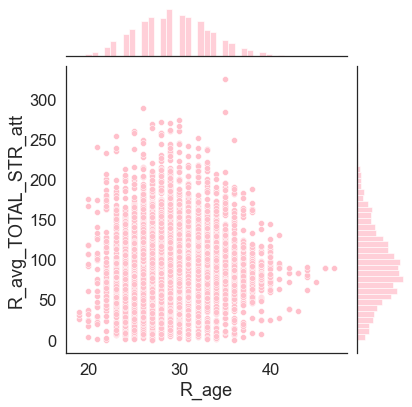

In [61]:
sns.set_style('white')
sns.jointplot(x='R_age', y='R_avg_TOTAL_STR_att',
            data=ufc, kind='scatter', color='pink')


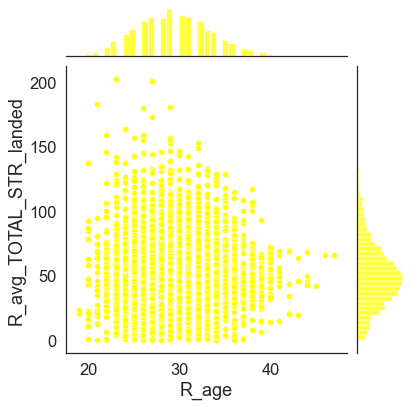

In [62]:
sns.set_style('white')
sns.jointplot(x='R_age', y='R_avg_TOTAL_STR_landed',
            data=ufc, kind='scatter', color='yellow')
